In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
#Load the csv file to a Pandas Dataframe
gd = pd.read_csv('gld_price_data.csv')

In [3]:
gd.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gd.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gd.shape

(2290, 6)

In [7]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gd.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
#Checking no. of missing values
gd.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
#Correlation b/w various parameters
corr = gd.corr()

In [12]:
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [82]:
type(corr)

pandas.core.frame.DataFrame

<AxesSubplot:>

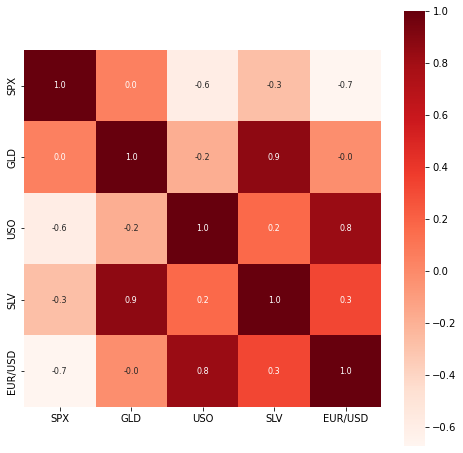

In [27]:
#Constructing heatmap to understand better
plt.figure(figsize=(8,8))
sns.heatmap(corr  , cbar=True , square=True , fmt = '.1f' , annot = True , annot_kws={'size':8} , cmap = 'Reds')

C:\Users\ersah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

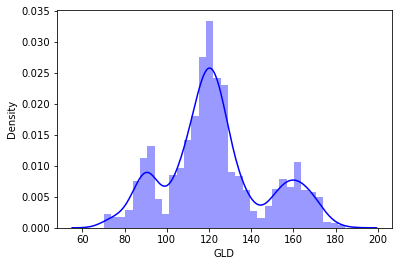

In [31]:
#Checking distribution of gold price
sns.distplot(gd['GLD'] , color='blue')

### Splitting columns

In [33]:
X = gd.drop(['Date' , 'GLD'] , axis = 1)
Y = gd['GLD']

In [36]:
#Feature df
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [37]:
#Target
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

### Model Training

In [61]:
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size= 0.2 , random_state= 4)

In [62]:
regressor = RandomForestRegressor(n_estimators=100)

In [63]:
#Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

### Model Evaluation

In [64]:
y_pred = regressor.predict(X_test)

In [65]:
y_pred

array([154.25490047, 165.36050095, 141.37290119, 120.74820104,
        86.20049969,  92.44429988, 120.67229906, 127.41390162,
       114.48150036, 127.40749725, 119.00109877,  89.77789995,
       120.4578002 , 128.63419922, 104.1244001 , 113.81100111,
       169.56060065,  97.80019968, 109.98219949, 110.40619858,
       166.504799  ,  85.04799833, 118.32930145, 118.44200078,
        87.87089929, 119.04520098, 118.36120073, 113.61710187,
       104.34670021, 108.35890022,  92.69959986, 114.7877004 ,
        91.52969939, 153.06169923, 109.09840062, 108.89089891,
       118.7987004 ,  72.88840216, 115.50790072, 117.56020035,
       104.99580066,  91.26469794, 117.19690038, 153.93080332,
       101.18189972,  74.98670014, 125.35180112, 108.69249927,
       150.32879958, 126.7409998 , 132.52400238, 110.80689989,
       127.32299888,  86.65949907, 149.02199973, 139.72100137,
        92.2675993 , 125.2509995 , 125.40860009, 169.29629986,
       153.77340214, 108.33449913, 137.15599857, 108.60

In [66]:
#R-squared error
r2 = metrics.r2_score(y_pred,Y_test)

In [67]:
r2

0.9899660453702956

In [68]:
# Model accuracy is 98.99%

In [69]:
type(Y_test)

pandas.core.series.Series

In [70]:
type(y_pred)

numpy.ndarray

### Comparison of actual values & predicted values

In [71]:
Y_test =list(Y_test)

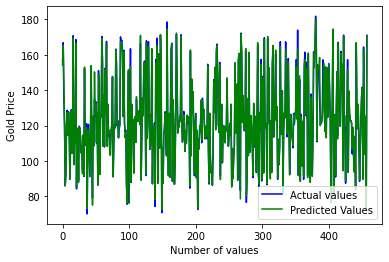

In [74]:
plt.plot(Y_test , color = 'blue' , label = 'Actual values' )
plt.plot(y_pred , color = 'green' , label ='Predicted Values')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()